# **1. Importações**

## Importação dos Avaliadores

In [2]:
#%pip install autorank

In [3]:
from utils.FileManager import FileManager
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report


In [4]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Frameworks

In [5]:
# importando o framework
from frame_oasis.OASIS import OASIS
from frame_lor.LOR import LOR

## Importação dos Detectores

In [6]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [7]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [8]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo
from regressores.modelosOnline.OSELM import OSELMModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [8]:
# Lista de séries temporais
series = [
    #"AAPL",
    #"B3SA3.SA",
    #"IXIC",
    #"DJI",
    #"GSPC",
    "BVSP",
    #"USDBRLX"
]

## Parâmetros

In [9]:
# Parâmetros do experimento
tamanho_batch = 300
lags = 10
repeticoes = 30  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

"""{
        "nome": "LR + ADWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": ADWINDetector,
        "deterministico": True
    },
    
    {
        "nome": "LR + HDDM_A",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector,
        "deterministico": True
    },
    
    {
        "nome": "LinearRegressionOnlineModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": True
    },
    
    {
        "nome": "HoeffdingTreeRegressorModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": True
    },
    
    {
        "nome": "OSELMModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": OSELMModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": False
    },"""

   """{
        "nome": "LOR - unique - 3 - lags",
        "avaliador": LOR(LinearRegressionModelo, KSWINDetector, reset="unique"),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector,
        "deterministico": False
    },
    
    {
        "nome": "LOR - incremental - 3 - lags",
        "avaliador": LOR(LinearRegressionModelo, KSWINDetector, reset="incremental"),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector,
        "deterministico": False
    },"""

In [10]:
modelos = [
    
 
    
    {
        "nome": "LR + KSWIN - 10 - lags",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector,
        "deterministico": False
    },    
]

# **4. Executando o Experimento**

In [11]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

Executando LR + KSWIN - 10 - lags na série: BVSP


In [ ]:
# salvando os resultados
arquivo_salvamento = "Experimento_liedson.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento_gabriel_lags_10.csv


'Experimento_gabriel_lags_10.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [70]:
arquivo_salvamento = "resultados/Experimento_gabriel.csv"

In [71]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [72]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [73]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,BayesianLinear,HoeffdingTreeRegressorModelo,LOR,LR + ADWIN,LR + HDDM_A,LR + KSWIN,OSELMModelo
serie,,,,,,,
AAPL,0.007968,NaN,0.006560,0.008157,0.010096,0.006900,0.015353
B3SA3.SA,0.029469,0.038586,0.030192,0.030514,0.030429,0.034437,0.044037
BVSP,0.017539,0.024016,0.015884,0.019567,0.020428,0.016491,0.022046
DJI,0.013574,0.017122,0.012131,0.020260,0.041150,0.013411,0.018635
GSPC,0.005660,0.120804,0.005113,0.006533,0.004958,0.005663,0.011397
IXIC,0.008735,0.051417,0.007570,0.010195,0.008503,0.008171,0.015228
USDBRLX,0.019844,0.026357,0.019662,0.019719,0.020380,0.021868,0.025008


### Desvio do MAE

In [74]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,BayesianLinear,HoeffdingTreeRegressorModelo,LOR,LR + ADWIN,LR + HDDM_A,LR + KSWIN,OSELMModelo
serie,,,,,,,
AAPL,0.0,NaN,0.000051,0.0,0.0,0.000184,0.004629
B3SA3.SA,0.0,0.0,0.000570,0.0,0.0,0.002385,0.005444
BVSP,0.0,0.0,0.000269,0.0,0.0,0.000389,0.002917
DJI,0.0,0.0,0.000358,0.0,0.0,0.000482,0.003416
GSPC,0.0,0.0,0.000243,0.0,0.0,0.000262,0.002241
IXIC,0.0,0.0,0.000130,0.0,0.0,0.000245,0.003367
USDBRLX,0.0,0.0,0.000315,0.0,0.0,0.001207,0.002132


### Média Detecções

In [75]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,BayesianLinear,HoeffdingTreeRegressorModelo,LOR,LR + ADWIN,LR + HDDM_A,LR + KSWIN,OSELMModelo
serie,,,,,,,
AAPL,NaN,NaN,19.900000,2.0,0.0,19.900000,NaN
B3SA3.SA,NaN,NaN,6.466667,1.0,0.0,6.500000,NaN
BVSP,NaN,NaN,13.100000,2.0,0.0,13.100000,NaN
DJI,NaN,NaN,13.933333,2.0,1.0,13.900000,NaN
GSPC,NaN,NaN,37.933333,2.0,0.0,37.966667,NaN
IXIC,NaN,NaN,21.366667,2.0,0.0,21.266667,NaN
USDBRLX,NaN,NaN,9.100000,1.0,0.0,9.066667,NaN


## Teste Estatístico

In [76]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo              BayesianLinear  HoeffdingTreeRegressorModelo       LOR  \
serie    repeticao                                                           
B3SA3.SA 1                0.029469                      0.038586  0.030204   
         2                0.029469                      0.038586  0.031210   
         3                0.029469                      0.038586  0.029962   
         4                0.029469                      0.038586  0.030563   
         5                0.029469                      0.038586  0.030146   
...                            ...                           ...       ...   
USDBRLX  26               0.019844                      0.026357  0.019518   
         27               0.019844                      0.026357  0.019454   
         28               0.019844                      0.026357  0.019763   
         29               0.019844                      0.026357  0.019418   
         30               0.019844                      0.026357  0.020497   

modelo              LR + ADWIN  LR + HDDM_A  LR + KSWIN  OSELMModelo  
serie    repeticao                                                    
B3SA3.SA 1            0.030514     0.030429    0.036730     0.039604  
         2            0.030514     0.030429    0.032134     0.049373  
         3            0.030514     0.030429    0.035914     0.053153  
         4            0.030514     0.030429    0.033101     0.046166  
         5            0.030514     0.030429    0.038922     0.041592  
...                        ...          ...         ...          ...  
USDBRLX  26           0.019719     0.020380    0.020224     0.024769  
         27           0.019719     0.020380    0.020069     0.025693  
         28           0.019719     0.020380    0.023248     0.024967  
         29           0.019719     0.020380    0.022014     0.029709  
         30           0.019719     0.020380    0.021449     0.025320  

[180 rows x 7 columns]

In [77]:
# computing the most appropriate statistical test
results = autorank(-mae_mean_table)
# printing the report
create_report(results)

The statistical analysis was conducted for 7 populations with 7 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.081). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=nan) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of

<Axes: >

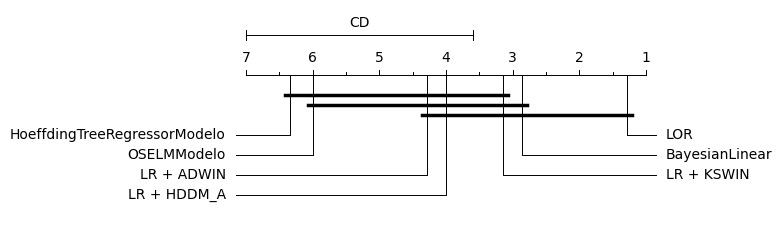

In [78]:
# plotting the results
plot_stats(results, allow_insignificant=True)

# **6. Plots para o Artigo**

## Liedson

In [25]:
# Ler o CSV
df = pd.read_csv('resultados/Experimento_liedson_pool.csv')

# Filtrar apenas a série desejada, se necessário (ex: BVSP)
df = df[df['serie'] == 'BVSP']

# Extrair o número de modelos e o tipo de métrica da coluna 'modelo'
df['n_modelos'] = df['modelo'].str.extract(r'(\d+)', expand=False).astype(int)
df['metrica'] = df['modelo'].apply(lambda x: 'Tempo' if 'time' in x else 'Performance')

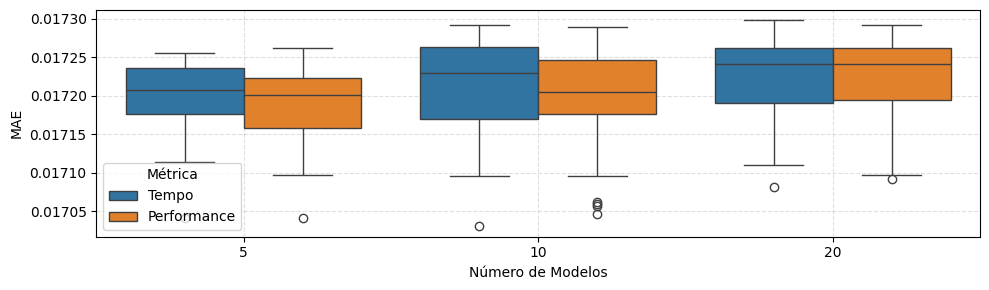

In [35]:
# Criar boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='n_modelos', y='mae', hue='metrica')

# Personalizações
#plt.title('Boxplot de Tempo e Performance por Nº de Modelos – Série BVSP')
plt.xlabel('Número de Modelos')
plt.ylabel('MAE')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()

## Gabriel

In [9]:
# Leitura do CSV
df = pd.read_csv("resultados/experimento_gabriel_lags.csv")

In [10]:
# Separar colunas de tipo e lag
df[['tipo', 'lags']] = df['modelo'].str.extract(r'^(.*?)-\s*(\d+)\s*- lags$')
df['tipo'] = df['tipo'].str.strip()  # Limpar espaços extras
df['lags'] = df['lags'].astype(int)

# Exibir estrutura
print(df.head())

  serie                   modelo  repeticao       mae  qtd_deteccoes  \
0  BVSP  LOR - unique - 3 - lags          1  0.015519             15   
1  BVSP  LOR - unique - 3 - lags          2  0.015747             11   
2  BVSP  LOR - unique - 3 - lags          3  0.016443             12   
3  BVSP  LOR - unique - 3 - lags          4  0.015756             12   
4  BVSP  LOR - unique - 3 - lags          5  0.015504             13   

           tipo  lags  
0  LOR - unique     3  
1  LOR - unique     3  
2  LOR - unique     3  
3  LOR - unique     3  
4  LOR - unique     3  


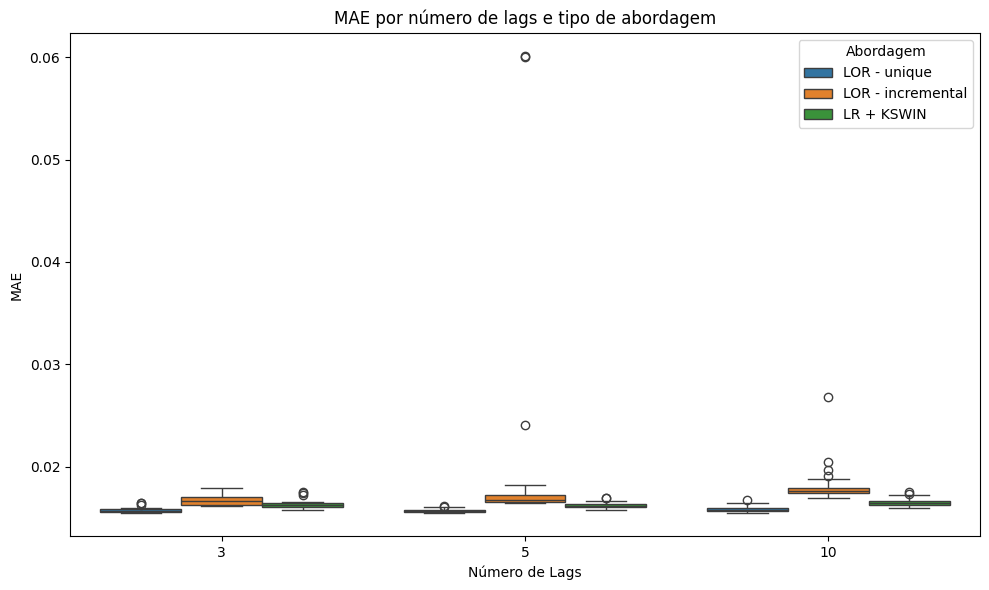

In [11]:
# Boxplot de MAE por abordagem e número de lags
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lags', y='mae', hue='tipo')
plt.title('MAE por número de lags e tipo de abordagem')
plt.ylabel('MAE')
plt.xlabel('Número de Lags')
plt.legend(title='Abordagem')
plt.tight_layout()
plt.show()

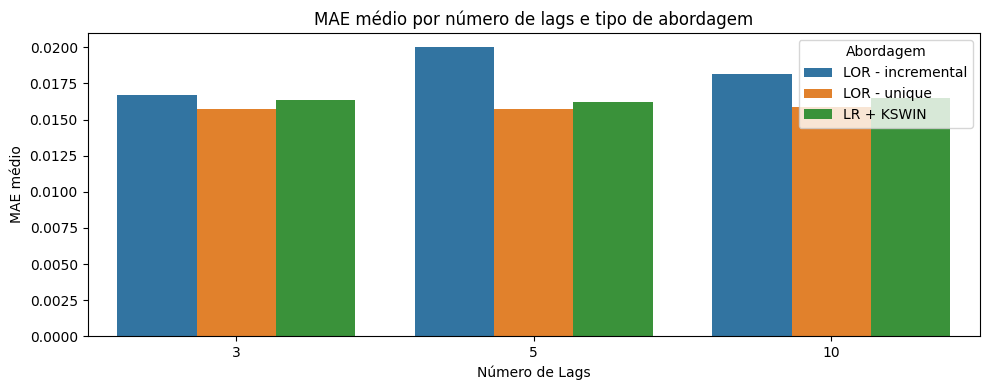

In [13]:
# Média do MAE por tipo e lag
df_grouped = df.groupby(['tipo', 'lags'])['mae'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(data=df_grouped, x='lags', y='mae', hue='tipo')
plt.title('MAE médio por número de lags e tipo de abordagem')
plt.ylabel('MAE médio')
plt.xlabel('Número de Lags')
plt.legend(title='Abordagem')
plt.tight_layout()
plt.show()